In [1]:
import pandas as pd
import os


In [3]:
# Define dataset location
data = r"C:\\Users\\Hasan\\Desktop\\data science folder"

# Load datasets
fraud_data_path = os.path.join(data, "Fraud_Data.csv")
ip_data_path = os.path.join(data, "IpAddress_to_Country.csv")
credit_card_path = os.path.join(data, "creditcard.csv")

fraud_data = pd.read_csv(fraud_data_path)
ip_data = pd.read_csv(ip_data_path)
credit_card_data = pd.read_csv(credit_card_path)

# Convert IP address to numeric for merging
fraud_data["ip_address"] = pd.to_numeric(fraud_data["ip_address"])
ip_data["lower_bound_ip_address"] = pd.to_numeric(ip_data["lower_bound_ip_address"])
ip_data["upper_bound_ip_address"] = pd.to_numeric(ip_data["upper_bound_ip_address"])

# Merge Fraud_Data with IpAddress_to_Country based on IP range
merged_fraud_data = fraud_data.merge(
    ip_data, 
    how="left", 
    left_on="ip_address", 
    right_on="lower_bound_ip_address"
)

# Drop unnecessary IP range columns
merged_fraud_data.drop(columns=["lower_bound_ip_address", "upper_bound_ip_address"], inplace=True)

# Print dataset information
print("Fraud Data + IP Merged Dataset Info:")
print(merged_fraud_data.info())
print(merged_fraud_data.head())

print("\nCredit Card Data Info:")
print(credit_card_data.info())
print(credit_card_data.head())


Fraud Data + IP Merged Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
 11  country         0 non-null       object 
dtypes: float64(1), int64(4), object(7)
memory usage: 13.8+ MB
None
   user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34

In [4]:

# Function to check missing values
def check_missing_values(df, name):
    print(f"\n🔍 Missing Values in {name} Dataset:")
    print(df.isnull().sum())

# Check missing values in each dataset
check_missing_values(fraud_data, "Fraud Data")
check_missing_values(ip_data, "IP Address Data")
check_missing_values(credit_card_data, "Credit Card Data")

# Handling missing values
# 1. Fraud Data
fraud_data.fillna({"browser": "Unknown", "source": "Unknown"}, inplace=True)  # Fill categorical missing values
fraud_data.dropna(inplace=True)  # Drop rows with missing numerical values

# 2. IP Address Data
ip_data.dropna(inplace=True)  # Drop missing rows (important for merging)

# 3. Credit Card Data
credit_card_data.fillna(credit_card_data.median(), inplace=True)  # Impute missing numerical values with median

# Verify missing values after handling
print("\n✅ Missing Values After Handling:")
check_missing_values(fraud_data, "Fraud Data")
check_missing_values(ip_data, "IP Address Data")
check_missing_values(credit_card_data, "Credit Card Data")

# Save cleaned datasets (optional)
fraud_data.to_csv(os.path.join(data, "Fraud_Data_Cleaned.csv"), index=False)
ip_data.to_csv(os.path.join(data, "IpAddress_to_Country_Cleaned.csv"), index=False)
credit_card_data.to_csv(os.path.join(data, "creditcard_Cleaned.csv"), index=False)

print("\n🎯 Data Cleaning Completed. Cleaned files saved!")



🔍 Missing Values in Fraud Data Dataset:
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

🔍 Missing Values in IP Address Data Dataset:
lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64

🔍 Missing Values in Credit Card Data Dataset:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

✅ Missing Values After Handling:

🔍 Missing Values in Fraud Data Dataset:
user_id           0
signup_time       0
purchase_time     0
purchase_value  

In [5]:

### 1️⃣ Remove Duplicates
def remove_duplicates(df, name):
    before = df.shape[0]
    df.drop_duplicates(inplace=True)
    after = df.shape[0]
    print(f"\n🧹 Removed {before - after} duplicate rows from {name} dataset.")
    return df

fraud_data = remove_duplicates(fraud_data, "Fraud Data")
ip_data = remove_duplicates(ip_data, "IP Address Data")
credit_card_data = remove_duplicates(credit_card_data, "Credit Card Data")

### 2️⃣ Correct Data Types
# Convert timestamps to datetime
fraud_data["signup_time"] = pd.to_datetime(fraud_data["signup_time"])
fraud_data["purchase_time"] = pd.to_datetime(fraud_data["purchase_time"])

# Convert IP address fields to numeric
fraud_data["ip_address"] = fraud_data["ip_address"].astype(int)
ip_data["lower_bound_ip_address"] = ip_data["lower_bound_ip_address"].astype(int)
ip_data["upper_bound_ip_address"] = ip_data["upper_bound_ip_address"].astype(int)

# Convert categorical fields
fraud_data["source"] = fraud_data["source"].astype("category")
fraud_data["browser"] = fraud_data["browser"].astype("category")
fraud_data["sex"] = fraud_data["sex"].astype("category")

# Convert fraud class labels to integers (optional, already int but ensuring consistency)
fraud_data["class"] = fraud_data["class"].astype(int)
credit_card_data["Class"] = credit_card_data["Class"].astype(int)

# Convert PCA features (V1 to V28) and amount to float (if needed)
for col in credit_card_data.columns:
    if col.startswith("V") or col == "Amount":
        credit_card_data[col] = credit_card_data[col].astype(float)

### ✅ Verify Changes
print("\n📊 Data Types After Cleaning:")
print("\nFraud Data:")
print(fraud_data.dtypes)

print("\nIP Address Data:")
print(ip_data.dtypes)

print("\nCredit Card Data:")
print(credit_card_data.dtypes)

# Save cleaned datasets
fraud_data.to_csv(os.path.join(data, "Fraud_Data_Final.csv"), index=False)
ip_data.to_csv(os.path.join(data, "IpAddress_to_Country_Final.csv"), index=False)
credit_card_data.to_csv(os.path.join(data, "creditcard_Final.csv"), index=False)

print("\n🎯 Data Cleaning Completed! Final cleaned files are saved.")



🧹 Removed 0 duplicate rows from Fraud Data dataset.

🧹 Removed 0 duplicate rows from IP Address Data dataset.

🧹 Removed 1081 duplicate rows from Credit Card Data dataset.

📊 Data Types After Cleaning:

Fraud Data:
user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                  category
browser                 category
sex                     category
age                        int64
ip_address                 int64
class                      int64
dtype: object

IP Address Data:
lower_bound_ip_address     int64
upper_bound_ip_address     int64
country                   object
dtype: object

Credit Card Data:
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14  

C:\Users\Hasan\AppData\Local\Temp\ipykernel_21212\2175943509.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="class", data=fraud_data, palette="coolwarm")


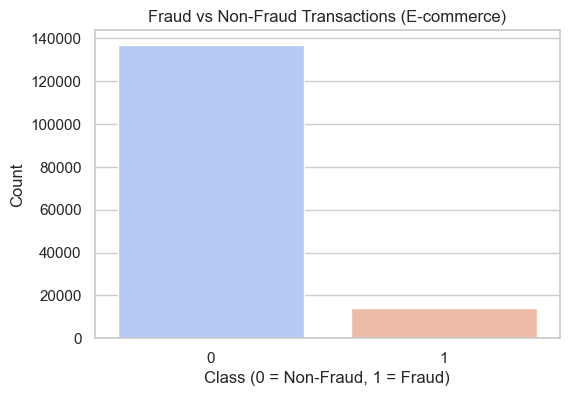

C:\Users\Hasan\AppData\Local\Temp\ipykernel_21212\2175943509.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Class", data=credit_card_data, palette="coolwarm")


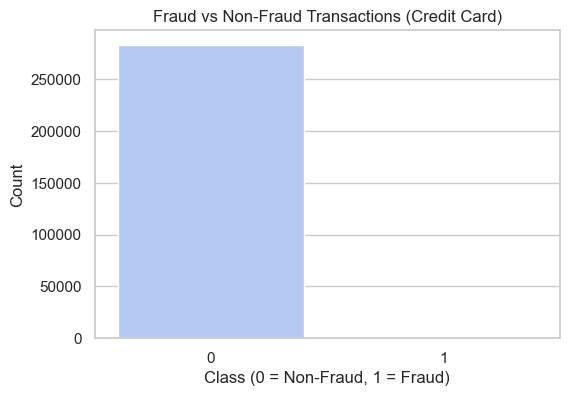

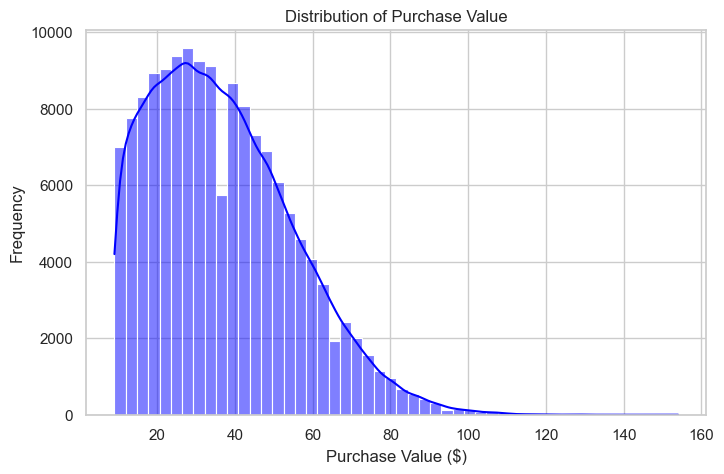

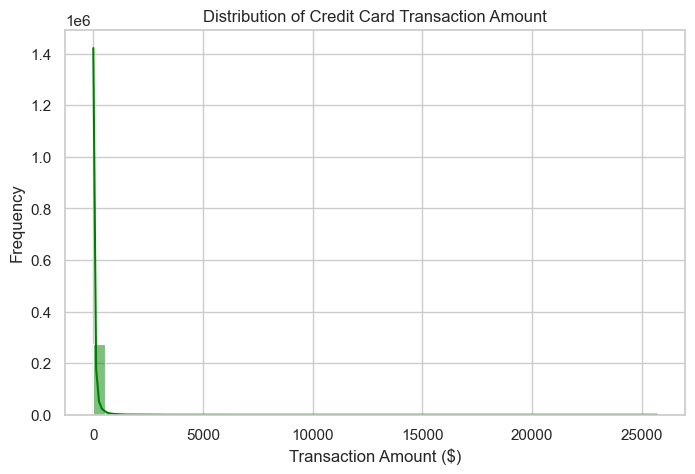

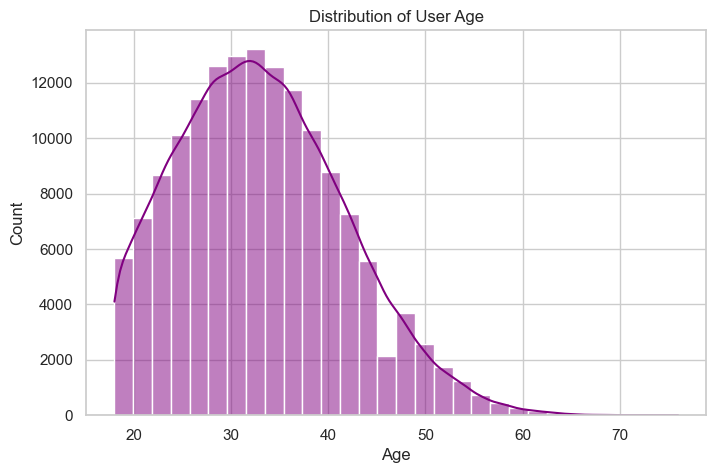

C:\Users\Hasan\AppData\Local\Temp\ipykernel_21212\2175943509.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="class", y="purchase_value", data=fraud_data, palette="coolwarm")


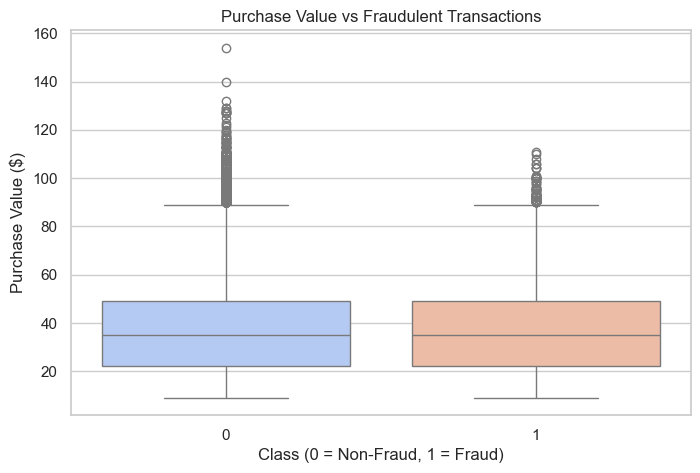

C:\Users\Hasan\AppData\Local\Temp\ipykernel_21212\2175943509.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="class", y="age", data=fraud_data, palette="coolwarm")


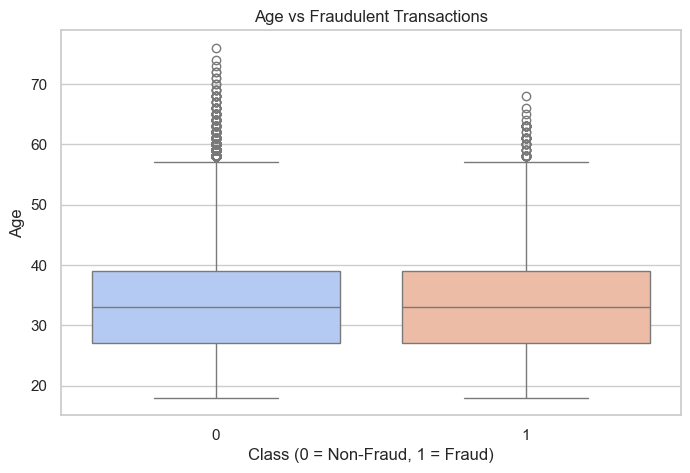

C:\Users\Hasan\AppData\Local\Temp\ipykernel_21212\2175943509.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="Amount", data=credit_card_data, palette="coolwarm")


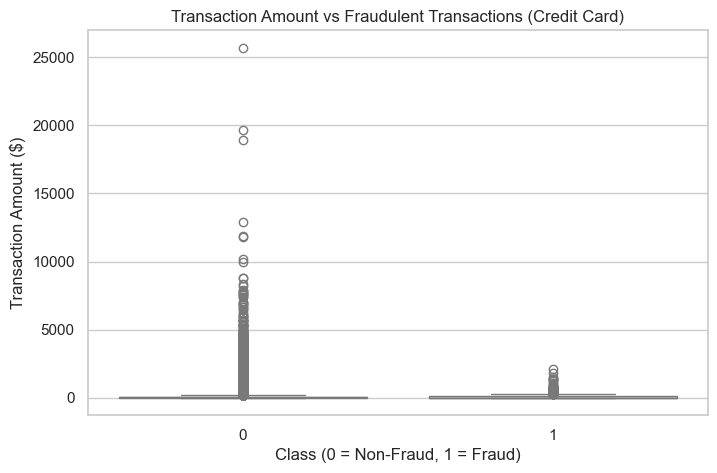


🎯 EDA Completed! Insights Generated.


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set(style="whitegrid")

# Define dataset location
data = r"C:\\Users\\Hasan\\Desktop\\data science folder"

# Load cleaned datasets
fraud_data = pd.read_csv(os.path.join(data, "Fraud_Data_Final.csv"))
credit_card_data = pd.read_csv(os.path.join(data, "creditcard_Final.csv"))

### 1️⃣ Univariate Analysis - Distribution of Single Variables

# Fraud Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x="class", data=fraud_data, palette="coolwarm")
plt.title("Fraud vs Non-Fraud Transactions (E-commerce)")
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x="Class", data=credit_card_data, palette="coolwarm")
plt.title("Fraud vs Non-Fraud Transactions (Credit Card)")
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

# Distribution of Purchase Values (E-commerce)
plt.figure(figsize=(8, 5))
sns.histplot(fraud_data["purchase_value"], bins=50, kde=True, color="blue")
plt.title("Distribution of Purchase Value")
plt.xlabel("Purchase Value ($)")
plt.ylabel("Frequency")
plt.show()

# Distribution of Transaction Amount (Credit Card)
plt.figure(figsize=(8, 5))
sns.histplot(credit_card_data["Amount"], bins=50, kde=True, color="green")
plt.title("Distribution of Credit Card Transaction Amount")
plt.xlabel("Transaction Amount ($)")
plt.ylabel("Frequency")
plt.show()

# Age Distribution of Users
plt.figure(figsize=(8, 5))
sns.histplot(fraud_data["age"], bins=30, kde=True, color="purple")
plt.title("Distribution of User Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

### 2️⃣ Bivariate Analysis - Relationship Between Two Variables

# Purchase Value vs Fraudulent Transactions
plt.figure(figsize=(8, 5))
sns.boxplot(x="class", y="purchase_value", data=fraud_data, palette="coolwarm")
plt.title("Purchase Value vs Fraudulent Transactions")
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Purchase Value ($)")
plt.show()

# Age vs Fraudulent Transactions
plt.figure(figsize=(8, 5))
sns.boxplot(x="class", y="age", data=fraud_data, palette="coolwarm")
plt.title("Age vs Fraudulent Transactions")
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Age")
plt.show()

# Credit Card Amount vs Fraudulent Transactions
plt.figure(figsize=(8, 5))
sns.boxplot(x="Class", y="Amount", data=credit_card_data, palette="coolwarm")
plt.title("Transaction Amount vs Fraudulent Transactions (Credit Card)")
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Transaction Amount ($)")
plt.show()

print("\n🎯 EDA Completed! Insights Generated.")


C:\Users\Hasan\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


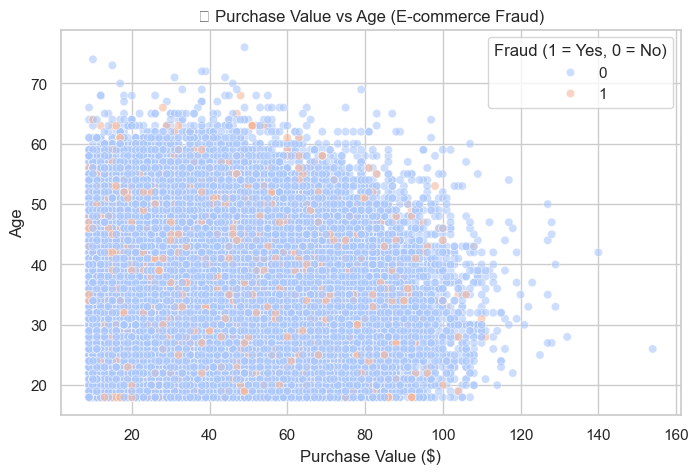

C:\Users\Hasan\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Hasan\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


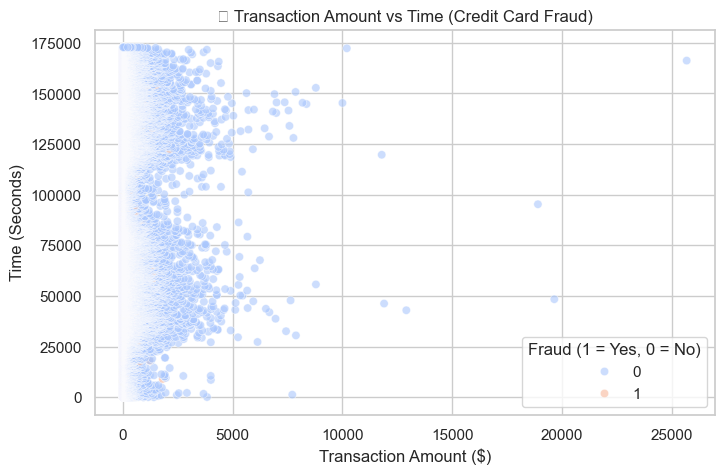

C:\Users\Hasan\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


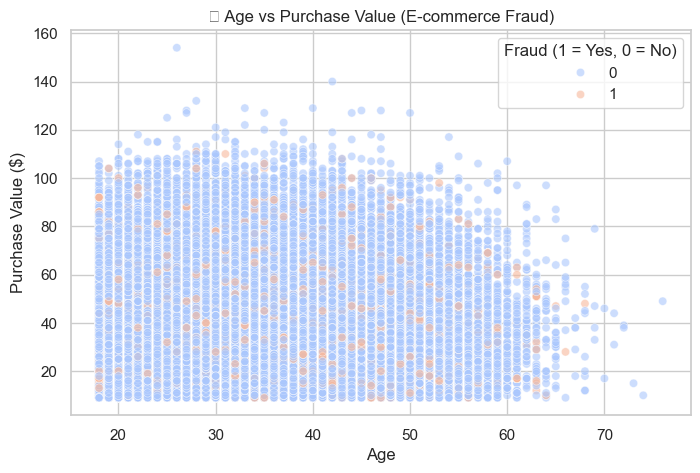


🎯 EDA Completed! Insights Generated.

📊 Features Most Correlated with Fraud:
Class    1.000000
V11      0.149067
V4       0.129326
V2       0.084624
V19      0.033631
V8       0.033068
V21      0.026357
V27      0.021892
V20      0.021486
V28      0.009682
Name: Class, dtype: float64

🚀 Insights Generated! See the heatmap for more details.


In [11]:
# Compute correlation matrix
corr_matrix = credit_card_data.corr()
# Set Seaborn style
sns.set(style="whitegrid")

### 1️⃣ Scatter Plot: Purchase Value vs Fraud (E-commerce Data)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=fraud_data["purchase_value"], y=fraud_data["age"], hue=fraud_data["class"], palette="coolwarm", alpha=0.6)
plt.title("📊 Purchase Value vs Age (E-commerce Fraud)")
plt.xlabel("Purchase Value ($)")
plt.ylabel("Age")
plt.legend(title="Fraud (1 = Yes, 0 = No)")
plt.show()

### 2️⃣ Scatter Plot: Transaction Amount vs Fraud (Credit Card Data)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=credit_card_data["Amount"], y=credit_card_data["Time"], hue=credit_card_data["Class"], palette="coolwarm", alpha=0.6)
plt.title("📊 Transaction Amount vs Time (Credit Card Fraud)")
plt.xlabel("Transaction Amount ($)")
plt.ylabel("Time (Seconds)")
plt.legend(title="Fraud (1 = Yes, 0 = No)")
plt.show()

### 3️⃣ Scatter Plot: Age vs Fraud (E-commerce Data)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=fraud_data["age"], y=fraud_data["purchase_value"], hue=fraud_data["class"], palette="coolwarm", alpha=0.6)
plt.title("📊 Age vs Purchase Value (E-commerce Fraud)")
plt.xlabel("Age")
plt.ylabel("Purchase Value ($)")
plt.legend(title="Fraud (1 = Yes, 0 = No)")
plt.show()

print("\n🎯 EDA Completed! Insights Generated.")
# Focus on correlation with fraud class
fraud_correlation = corr_matrix["Class"].sort_values(ascending=False)
print("\n📊 Features Most Correlated with Fraud:")
print(fraud_correlation.head(10))  # Show top 10 most correlated features
print("\n🚀 Insights Generated! See the heatmap for more details.")

In [12]:
import ipaddress

# Define the dataset location
data = r"C:\\Users\\Hasan\\Desktop\\data science folder"

# Load the cleaned datasets
fraud_data = pd.read_csv(os.path.join(data, "Fraud_Data_Final.csv"))
credit_card_data = pd.read_csv(os.path.join(data, "creditcard_Final.csv"))
ip_address_data = pd.read_csv(os.path.join(data, "IpAddress_to_Country_Final.csv"))

In [13]:
# Function to convert an IP to an integer
def ip_to_int(ip):
    return int(ipaddress.ip_address(ip))

# Convert IP addresses in fraud_data to integers
fraud_data['IP_int'] = fraud_data['ip_address'].apply(ip_to_int)

# Convert IP ranges in ip_address_data to integers
ip_address_data['lower_bound_ip_int'] = ip_address_data['lower_bound_ip_address'].apply(ip_to_int)
ip_address_data['upper_bound_ip_int'] = ip_address_data['upper_bound_ip_address'].apply(ip_to_int)


In [16]:
import pandas as pd
import os
import ipaddress

# Define dataset location
data = r"C:\\Users\\Hasan\\Desktop\\data science folder"

# Load the cleaned datasets
fraud_data = pd.read_csv(os.path.join(data, "Fraud_Data_Final.csv"))
ip_address_data = pd.read_csv(os.path.join(data, "IpAddress_to_Country_Final.csv"))

# Function to convert an IP to an integer
def ip_to_int(ip):
    return int(ipaddress.ip_address(ip))

# Convert IPs to integers in fraud_data
fraud_data['IP_int'] = fraud_data['ip_address'].apply(ip_to_int)

# Convert IP ranges to integers in ip_address_data
ip_address_data['lower_bound_ip_int'] = ip_address_data['lower_bound_ip_address'].apply(ip_to_int)
ip_address_data['upper_bound_ip_int'] = ip_address_data['upper_bound_ip_address'].apply(ip_to_int)

# Sort ip_address_data by lower_bound_ip_int for efficient range lookup
ip_address_data = ip_address_data.sort_values(by='lower_bound_ip_int')

# Function to find the country for a given IP integer efficiently
def find_country(ip_int):
    # Use a more efficient range comparison (binary search approach)
    matched_rows = ip_address_data[(ip_address_data['lower_bound_ip_int'] <= ip_int) & 
                                    (ip_address_data['upper_bound_ip_int'] >= ip_int)]
    if not matched_rows.empty:
        return matched_rows['country'].iloc[0]
    return None  # Return None if no country is found

# Apply the function to fraud_data using a more efficient vectorized approach
fraud_data['country'] = fraud_data['IP_int'].apply(find_country)

# Display the merged data
print(fraud_data.head())

# Optional: Save the merged data to a new CSV
fraud_data.to_csv(os.path.join(data, "Merged_Fraud_Data_with_Country.csv"), index=False)


   user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   

       device_id source browser sex  age  ip_address  class      IP_int  \
0  QVPSPJUOCKZAR    SEO  Chrome   M   39   732758368      0   732758368   
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53   350311387      0   350311387   
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2621473820      1  2621473820   
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3840542443      0  3840542443   
4  NAUITBZFJKHWW    Ads  Safari   M   45   415583117      0   415583117   

         country  
0          Japan  
1  United States  
2  United States  
3           None  
4  United States  


In [17]:
# Convert 'purchase_time' to datetime format
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'])


In [18]:
# Extract hour of the day and day of the week
fraud_data['hour_of_day'] = fraud_data['purchase_time'].dt.hour
fraud_data['day_of_week'] = fraud_data['purchase_time'].dt.dayofweek


In [19]:
# Calculate transaction frequency per user
fraud_data['transaction_frequency'] = fraud_data.groupby('user_id')['user_id'].transform('count')


In [23]:

# Define dataset location
data = r"C:\\Users\\Hasan\\Desktop\\data science folder"

# Load the cleaned fraud data
fraud_data = pd.read_csv(os.path.join(data, "Fraud_Data_Final.csv"))

# Convert 'purchase_time' to datetime format
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'])

# Extract hour of the day and day of the week
fraud_data['hour_of_day'] = fraud_data['purchase_time'].dt.hour
fraud_data['day_of_week'] = fraud_data['purchase_time'].dt.dayofweek

# Calculate transaction frequency per user
fraud_data['transaction_frequency'] = fraud_data.groupby('user_id')['user_id'].transform('count')

# Sort the data by user_id and purchase_time
fraud_data = fraud_data.sort_values(by=['user_id', 'purchase_time'])

# Debugging: Print a sample of the data to check if multiple transactions exist for users
print(fraud_data[['user_id', 'purchase_time', 'transaction_frequency']].head(20))

# Calculate the time difference between consecutive transactions (in seconds)
fraud_data['transaction_velocity'] = fraud_data.groupby('user_id')['purchase_time'].diff().dt.total_seconds()

# Handle NaN values in 'transaction_velocity' for users with a single transaction
fraud_data['transaction_velocity'] = fraud_data['transaction_velocity'].fillna(0)

# Display the updated fraud data with the new features
print(fraud_data[['user_id', 'purchase_time', 'hour_of_day', 'day_of_week', 'transaction_frequency', 'transaction_velocity']].head(20))


        user_id       purchase_time  transaction_frequency
116708        2 2015-02-21 10:03:37                      1
15108         4 2015-09-26 21:32:16                      1
46047         8 2015-08-13 11:53:07                      1
67650         9 2015-05-20 23:06:42                      1
109067       12 2015-03-04 20:56:37                      1
1979         16 2015-03-12 12:46:23                      1
111743       18 2015-10-23 00:18:57                      1
138000       26 2015-03-21 09:04:08                      1
149540       33 2015-10-28 18:12:41                      1
87224        39 2015-01-08 18:13:26                      1
39028        41 2015-03-23 10:10:08                      1
150854       44 2015-06-26 05:45:06                      1
110249       47 2015-04-04 09:08:26                      1
137822       48 2015-07-30 10:51:47                      1
19512        50 2015-07-29 17:12:41                      1
71710        57 2015-09-05 00:42:42                     

In [28]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Create a scaler object for Min-Max scaling (Normalization)
min_max_scaler = MinMaxScaler()

# Create a scaler object for Standard scaling (Standardization)
standard_scaler = StandardScaler()

# List of numerical columns that we want to scale/normalize
numerical_columns = ['purchase_value', 'transaction_frequency', 'transaction_velocity']

# Apply Min-Max Scaling (Normalization)
fraud_data[numerical_columns] = min_max_scaler.fit_transform(fraud_data[numerical_columns])

# Alternatively, apply Standard Scaling (Standardization)
# fraud_data[numerical_columns] = standard_scaler.fit_transform(fraud_data[numerical_columns])

# Check the first few rows after normalization
print(fraud_data[numerical_columns].head())


        purchase_value  transaction_frequency  transaction_velocity
116708        0.310345                    0.0                   0.0
15108         0.220690                    0.0                   0.0
46047         0.262069                    0.0                   0.0
67650         0.365517                    0.0                   0.0
109067        0.179310                    0.0                   0.0


In [33]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

# Create a scaler object for Min-Max scaling (Normalization)
min_max_scaler = MinMaxScaler()

# Create a scaler object for Standard scaling (Standardization)
standard_scaler = StandardScaler()

# List of numerical columns that we want to scale/normalize
numerical_columns = ['purchase_value', 'transaction_frequency', 'transaction_velocity']

# Apply Min-Max Scaling (Normalization)
fraud_data[numerical_columns] = min_max_scaler.fit_transform(fraud_data[numerical_columns])

# Alternatively, apply Standard Scaling (Standardization)
# fraud_data[numerical_columns] = standard_scaler.fit_transform(fraud_data[numerical_columns])

# Apply Label Encoding for binary categorical feature 'sex'
label_encoder = LabelEncoder()
fraud_data['sex'] = label_encoder.fit_transform(fraud_data['sex'])

# Since 'source' is already one-hot encoded as 'source_Direct' and 'source_SEO',
# we don't need to apply pd.get_dummies again to the 'source' column.

# Check the transformed data
print(fraud_data.head())


        user_id          signup_time       purchase_time  purchase_value  \
116708        2  2015-01-11 03:47:13 2015-02-21 10:03:37        0.310345   
15108         4  2015-06-02 16:40:57 2015-09-26 21:32:16        0.220690   
46047         8  2015-05-28 07:53:06 2015-08-13 11:53:07        0.262069   
67650         9  2015-05-16 15:58:32 2015-05-20 23:06:42        0.365517   
109067       12  2015-01-10 06:25:12 2015-03-04 20:56:37        0.179310   

            device_id  browser  sex  age  ip_address  class  hour_of_day  \
116708  FGBQNDNBETFJJ   Chrome    0   25   880217484      0           10   
15108   MKFUIVOHLJBYN   Safari    0   38  2785906106      0           21   
46047   SCQGQALXBUQZJ   Chrome    1   25   356056736      0           11   
67650   IEZOHXPZBIRTE  FireFox    1   21   759104706      0           23   
109067  MSNWCFEHKTIOY   Safari    1   19  2985180352      0           20   

        day_of_week  transaction_frequency  transaction_velocity  \
116708            

In [35]:
from sklearn.model_selection import train_test_split
#model building and training
# 1. Feature and Target Separation for Fraud_Data
X_fraud = fraud_data.drop(columns=['class'])  # Features for Fraud_Data
y_fraud = fraud_data['class']  # Target for Fraud_Data

# 2. Feature and Target Separation for creditcard
X_creditcard = credit_card_data.drop(columns=['Class'])  # Features for creditcard
y_creditcard = credit_card_data['Class']  # Target for creditcard

# 3. Train-Test Split for Fraud_Data
X_fraud_train, X_fraud_test, y_fraud_train, y_fraud_test = train_test_split(
    X_fraud, y_fraud, test_size=0.2, random_state=42)

# 4. Train-Test Split for creditcard
X_creditcard_train, X_creditcard_test, y_creditcard_train, y_creditcard_test = train_test_split(
    X_creditcard, y_creditcard, test_size=0.2, random_state=42)

# Check the shapes of the split data
print(f"Fraud Data Train shape: {X_fraud_train.shape}, Test shape: {X_fraud_test.shape}")
print(f"Credit Card Data Train shape: {X_creditcard_train.shape}, Test shape: {X_creditcard_test.shape}")


Fraud Data Train shape: (120889, 15), Test shape: (30223, 15)
Credit Card Data Train shape: (226980, 30), Test shape: (56746, 30)


In [39]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Sample code to load your data
# X_fraud = pd.read_csv('fraud_data.csv')
# y_fraud = X_fraud.pop('target')  # assuming 'target' is the column you want to predict
# X_creditcard = pd.read_csv('creditcard_data.csv')
# y_creditcard = X_creditcard.pop('target')

# Preprocessing function to handle date and categorical columns
def preprocess_data(X):
    # Handle date columns
    if 'timestamp' in X.columns:
        # Convert 'timestamp' to datetime
        X['timestamp'] = pd.to_datetime(X['timestamp'], errors='coerce')  # Coerce invalid dates to NaT
        
        # Extract relevant time features from 'timestamp'
        X['year'] = X['timestamp'].dt.year
        X['month'] = X['timestamp'].dt.month
        X['day'] = X['timestamp'].dt.day
        X['hour'] = X['timestamp'].dt.hour
        X['minute'] = X['timestamp'].dt.minute
        
        # Drop the original timestamp column after extracting features
        X.drop(columns=['timestamp'], inplace=True)

    # Convert categorical columns to numeric using LabelEncoder
    for column in X.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column])

    # Ensure there are no missing values (you can handle this differently based on your dataset)
    X.fillna(0, inplace=True)  # Filling missing values with 0 (can change this to impute with mean/median)

    # Ensure no datetime columns remain (if any other datetime columns exist, they should also be handled)
    for col in X.select_dtypes(include=['datetime64']).columns:
        X.drop(columns=[col], inplace=True)
    
    return X

# Apply preprocessing to the datasets
X_fraud = preprocess_data(X_fraud)
X_creditcard = preprocess_data(X_creditcard)

# Train-test split
X_fraud_train, X_fraud_test, y_fraud_train, y_fraud_test = train_test_split(X_fraud, y_fraud, test_size=0.3, random_state=42)
X_creditcard_train, X_creditcard_test, y_creditcard_train, y_creditcard_test = train_test_split(X_creditcard, y_creditcard, test_size=0.3, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
}

# Function to train and evaluate models
def train_and_evaluate_model(X_train, X_test, y_train, y_test, models):
    results = {}
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict on the test set
        y_pred = model.predict(X_test)
        
        # Evaluate performance
        accuracy = model.score(X_test, y_test)
        auc_roc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])  # AUC-ROC score
        
        results[model_name] = {
            "accuracy": accuracy,
            "AUC-ROC": auc_roc,
            "classification_report": classification_report(y_test, y_pred)
        }
    return results

# Train and evaluate on Fraud Data
results_fraud_data = train_and_evaluate_model(X_fraud_train, X_fraud_test, y_fraud_train, y_fraud_test, models)

# Train and evaluate on Credit Card Data
results_creditcard_data = train_and_evaluate_model(X_creditcard_train, X_creditcard_test, y_creditcard_train, y_creditcard_test, models)

# Print results for comparison
print("Fraud Data Results:\n")
for model_name, result in results_fraud_data.items():
    print(f"{model_name}:\n Accuracy: {result['accuracy']}\n AUC-ROC: {result['AUC-ROC']}")
    print(result['classification_report'])
    print("-" * 60)

print("\nCredit Card Data Results:\n")
for model_name, result in results_creditcard_data.items():
    print(f"{model_name}:\n Accuracy: {result['accuracy']}\n AUC-ROC: {result['AUC-ROC']}")
    print(result['classification_report'])
    print("-" * 60)


c:\Users\Hasan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Hasan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Hasan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1

Fraud Data Results:

Logistic Regression:
 Accuracy: 0.9067587241364098
 AUC-ROC: 0.7494428686342058
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     41107
           1       0.00      0.00      0.00      4227

    accuracy                           0.91     45334
   macro avg       0.45      0.50      0.48     45334
weighted avg       0.82      0.91      0.86     45334

------------------------------------------------------------
Decision Tree:
 Accuracy: 0.8998764724048176
 AUC-ROC: 0.7463388763060603
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     41107
           1       0.47      0.56      0.51      4227

    accuracy                           0.90     45334
   macro avg       0.71      0.75      0.73     45334
weighted avg       0.91      0.90      0.90     45334

------------------------------------------------------------
Random Forest:
 Accuracy: 0.9555741827326069
 AUC